# Predicting Employee Turnover

## Main Objectives 

1.Apply decision trees and random forests with scikit-learn to classification problems.

2.Interpret decision trees and random forest models using feature importance plots.

3.Tune model hyperparamters to improve classification accuracy.

4.Create interactive, GUI components in Jupyter notebooks using widgets.

## Importing Libraries 

In [4]:
%matplotlib inline
import os
import warnings
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as image
import pandas as pd
plt.style.use("ggplot")
warnings.simplefilter("ignore")


In [8]:
plt.rcParams['figure.figsize']=(12,8)
plt.rcParams['figure.facecolor']='white'

## Exploratory Analysis

In [6]:
hr=pd.read_csv(r'C:\Users\snehpreet\Desktop\employee_data.csv')
hr.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,quit,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


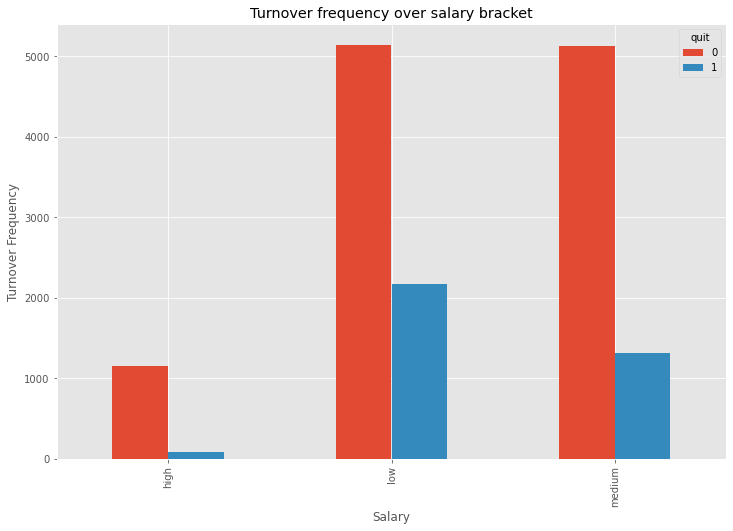

In [9]:
pd.crosstab(hr.salary,hr.quit).plot(kind='bar')
plt.title('Turnover frequency over salary bracket')
plt.xlabel('Salary')
plt.ylabel('Turnover Frequency')
plt.show()

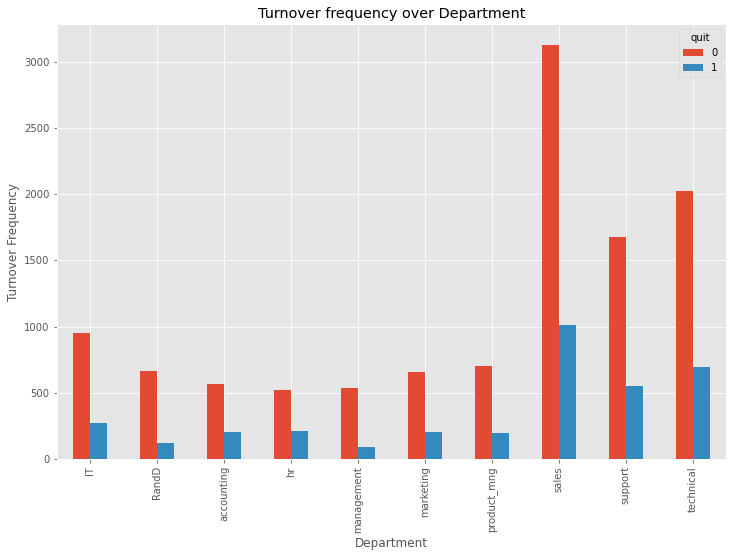

In [10]:
pd.crosstab(hr.department,hr.quit).plot(kind='bar')
plt.title('Turnover frequency over Department')
plt.xlabel('Department')
plt.ylabel('Turnover Frequency')
plt.show()

## Encoding Categorical Values 

In [11]:
cat_vars=['department','salary']
for var in cat_vars:
    cat_list=pd.get_dummies(hr[var],prefix=var)
    hr=hr.join(cat_list)
    

In [12]:
hr.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,quit,promotion_last_5years,department,salary,...,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,salary_high,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,1,0,sales,low,...,0,0,0,0,1,0,0,0,1,0
1,0.80,0.86,5,262,6,0,1,0,sales,medium,...,0,0,0,0,1,0,0,0,0,1
2,0.11,0.88,7,272,4,0,1,0,sales,medium,...,0,0,0,0,1,0,0,0,0,1
3,0.72,0.87,5,223,5,0,1,0,sales,low,...,0,0,0,0,1,0,0,0,1,0
4,0.37,0.52,2,159,3,0,1,0,sales,low,...,0,0,0,0,1,0,0,0,1,0


In [13]:
hr.drop(columns=['department','salary'],axis=1,inplace=True)

## Visualizing Class Imbalance 

In [14]:
from yellowbrick.target import ClassBalance
plt.style.use("ggplot")
plt.rcParams['figure.figsize']=(12,8)

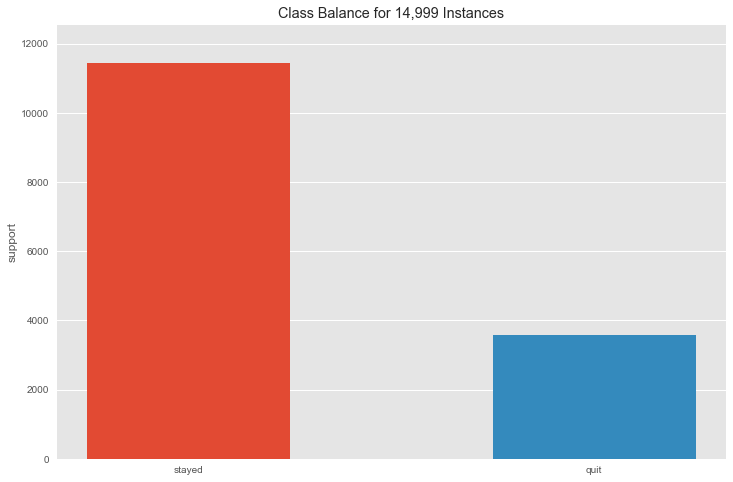

In [15]:
from yellowbrick.datasets import load_game
X, y = load_game()
visualizer=ClassBalance(labels=['stayed','quit'])
visualizer.fit(hr.quit)
visualizer.show()

In [16]:
x=hr.loc[:,hr.columns!='quit']
y=hr.quit


## Creating Training and Validation Sets 

In [17]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0,test_size=0.2,stratify=y)

In [18]:
from sklearn import tree
from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import export_graphviz
from IPython.display import SVG
from graphviz import Source
from IPython.display import display
from IPython.display import Image
import ipywidgets
from ipywidgets import interact,interactive,IntSlider,FloatSlider
from subprocess import call
import matplotlib.image as mpimg


## Building a Decision Tree Classifier with Interactive Controls 

In [19]:
@interact
def plot_tree(crit=['gini','entropy'],
              split=['best','random'],
              depth=IntSlider(min=1,max=10,value=2,continuous_update=False),
              min_split=IntSlider(min=2,max=5,value=2,continuous_update=False),
              min_leaf=IntSlider(min=1,max=5,value=1,continuous_update=False)):
    estimator=DecisionTreeClassifier(random_state=0,
                                    criterion=crit,
                                    splitter=split,
                                    max_depth=depth,
                                    min_samples_split=min_split,
                                    min_samples_leaf=min_leaf)
    estimator.fit(x_train,y_train)
    print('Decision Tree Training Accuracy {:.3f}'.format(accuracy_score(y_train,estimator.predict(x_train))))
    print('Decision Tree Test Accuracy {:.3f}'.format(accuracy_score(y_test,estimator.predict(x_test))))
    plt.figure()
    tree.plot_tree(estimator,
                    feature_names=x_train.columns,
                   class_names=['stayed','quit'],filled=True)
    plt.savefig('tree_high_dpi', dpi=100)
    plt.show()
    return estimator

interactive(children=(Dropdown(description='crit', options=('gini', 'entropy'), value='gini'), Dropdown(descri…

## Building a Random Forest Classifier with Interactive Controls

In [20]:
@interact
def plot_tree_rf(crit=['gini','entropy'],
              bootstrap=['True','False'],
              depth=IntSlider(min=1,max=30,value=3,continuous_update=False),
              forests=IntSlider(min=1,max=200,value=100,continuous_update=False),
              min_split=IntSlider(min=2,max=5,value=2,continuous_update=False),
              min_leaf=IntSlider(min=1,max=5,value=1,continuous_update=False)):
    estimator=RandomForestClassifier(random_state=0,
                                    criterion=crit,
                                    bootstrap=bootstrap,
                                    n_estimators=forests,
                                    max_depth=depth,
                                    min_samples_split=min_split,
                                    min_samples_leaf=min_leaf,
                                    n_jobs=-1,
                                    verbose=False).fit(x_train,y_train)
    print('Random Forest Training Accuracy {:.3f}'.format(accuracy_score(y_train,estimator.predict(x_train))))
    print('Random Forest Test Accuracy {:.3f}'.format(accuracy_score(y_test,estimator.predict(x_test))))
    num_tree=estimator.estimators_[0]
    print('Visualizing Tree: ',0)
    plt.figure()

    tree.plot_tree(num_tree,
                   feature_names=x_train.columns,
                   class_names=['stayed','quit'],
                   filled=True)
    plt.savefig('individual.png')
    plt.show()
    return estimator
    

interactive(children=(Dropdown(description='crit', options=('gini', 'entropy'), value='gini'), Dropdown(descri…

## Feature Importance Plots and Evaluation Metrics 

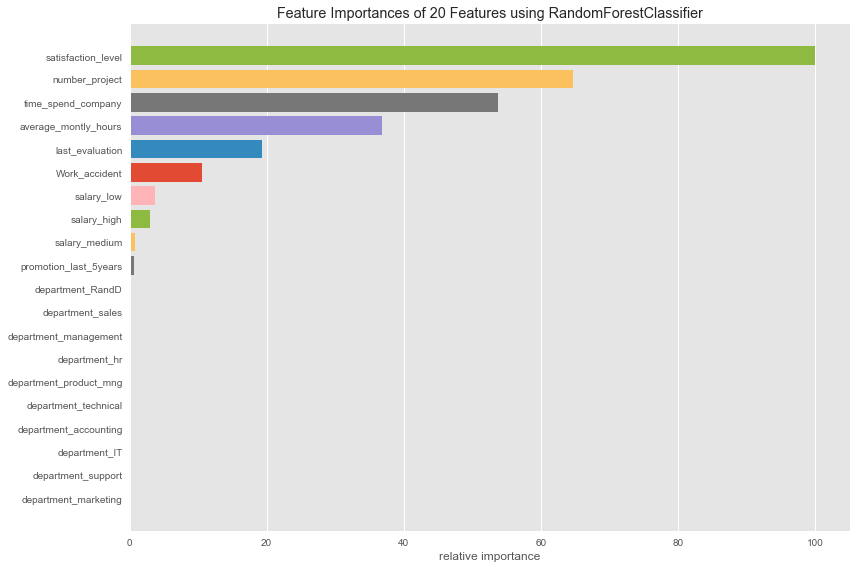

In [21]:
from yellowbrick.model_selection import FeatureImportances
plt.rcParams['figure.figsize']=(12,8)
plt.style.use("ggplot")
rf=RandomForestClassifier(bootstrap='True', ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=3, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=0,
                       verbose=False, warm_start=False)
viz=FeatureImportances(rf)
viz.fit(x_train,y_train)
viz.show()


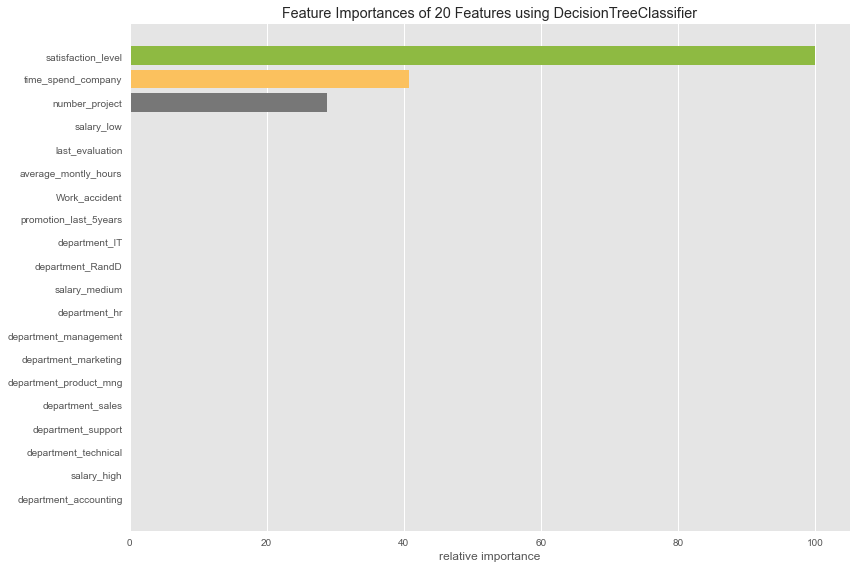

In [25]:
dt=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')
viz=FeatureImportances(dt)
viz.fit(x_train,y_train)
viz.show()

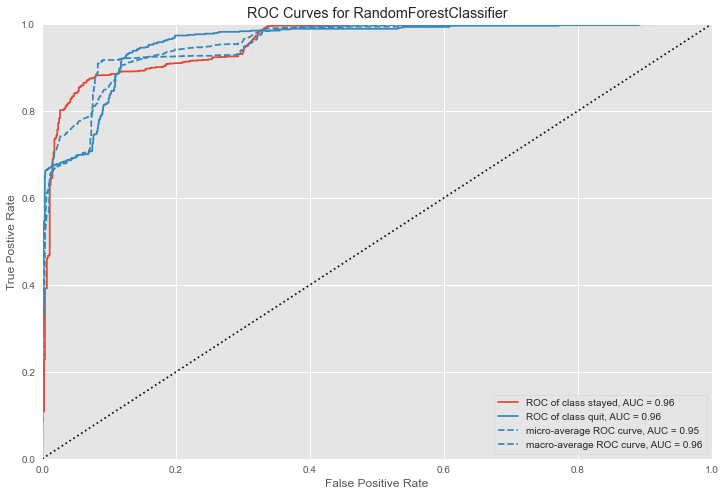

In [22]:
from yellowbrick.classifier import ROCAUC
visualizer=ROCAUC(rf,classes=['stayed','quit'])
visualizer.fit(x_train,y_train)
visualizer.score(x_test,y_test)
visualizer.poof();

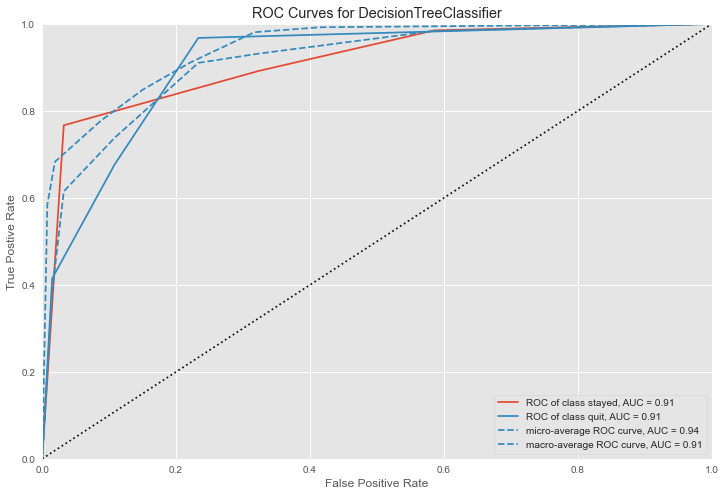

In [26]:
from yellowbrick.classifier import ROCAUC
visualizer=ROCAUC(dt,classes=['stayed','quit'])
visualizer.fit(x_train,y_train)
visualizer.score(x_test,y_test)
visualizer.poof();